In [39]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## New Institutions

In [40]:
df = pd.read_csv("../../data/New_Institutions_10_21_2021.csv")
df.head()

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,58,73,94,95,96,97,98,99,102) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ACQDATE,ACQYEAR,ASSISTED_PAYOUT_FLAG,BANK_INSURED,CERT,CHANGECODE,CHANGECODE_DESC,CHANGECODE_DESC_LONG,CHARTAGENT,CHARTER_COM_TO_OTHER_FLAG,...,FRM_CERT,FRM_CHARTAGENT,FRM_CNTYNAME,FRM_INSTNAME,FRM_ORGTYPE,FRM_PADDR,FRM_PCITY,FRM_PZIP5,FRM_PZIPREST,FRM_TRUST
0,1986-09-16T00:00:00,1986,0,N,45583,110,NEW INSTITUTION,Institution established but was not FDIC insur...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-03-29T00:00:00,2006,0,Y,34619,110,NEW INSTITUTION,Institution established. Original name: ITS Ba...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-29T00:00:00,2006,0,Y,35045,110,NEW INSTITUTION,Institution established. Original name: Bristo...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-05-04T00:00:00,2000,0,Y,35417,110,NEW INSTITUTION,Institution established. Original name: TriSta...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-12-31T00:00:00,2002,0,Y,35347,110,NEW INSTITUTION,Institution established. Original name: Nation...,OCC,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
x = df[['EFFYEAR', "CLASS_TYPE", 'CERT']]
x = x[x['EFFYEAR']>1999]
new_by_year = x.groupby(['CLASS_TYPE', 'EFFYEAR']).count()['CERT'].reset_index()

new_by_year.columns = ['Class Type', 'Effective Year', 'Count']

In [56]:
for year in range(2000, 2022):
    temp_com = new_by_year.loc[(new_by_year['Effective Year'] == year) &
                               (new_by_year['Class Type'] == 'C')]
    temp_sav = new_by_year.loc[(new_by_year['Effective Year'] == year) &
                               (new_by_year['Class Type'] == 'S')]
    if len(temp_com) != 1:
        new_by_year = new_by_year.append({'Class Type': 'C', 'Effective Year': year, 'Count': 0}, ignore_index=True)
    if len(temp_sav) != 1:
        new_by_year = new_by_year.append({'Class Type': 'S', 'Effective Year': year, 'Count': 0}, ignore_index=True)

new_by_year = new_by_year.sort_values(by=['Class Type', 'Effective Year']).reset_index(drop=True)

new_by_year_reformat = pd.DataFrame(new_by_year.loc[new_by_year['Class Type'] == 'C', 'Effective Year'])
new_by_year_reformat['Commercial'] = list(new_by_year.loc[new_by_year['Class Type'] == 'C', 'Count'])
new_by_year_reformat['Savings'] = list(new_by_year.loc[new_by_year['Class Type'] == 'S', 'Count'])
new_by_year_reformat

,Effective Year,Commercial,Savings
0,2000,190,33
1,2001,127,18
2,2002,91,3
3,2003,110,7
4,2004,122,6
5,2005,167,14
6,2006,179,16
7,2007,176,17
8,2008,91,8
9,2009,29,8


<ipython-input-57-d5f5a12a967d>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


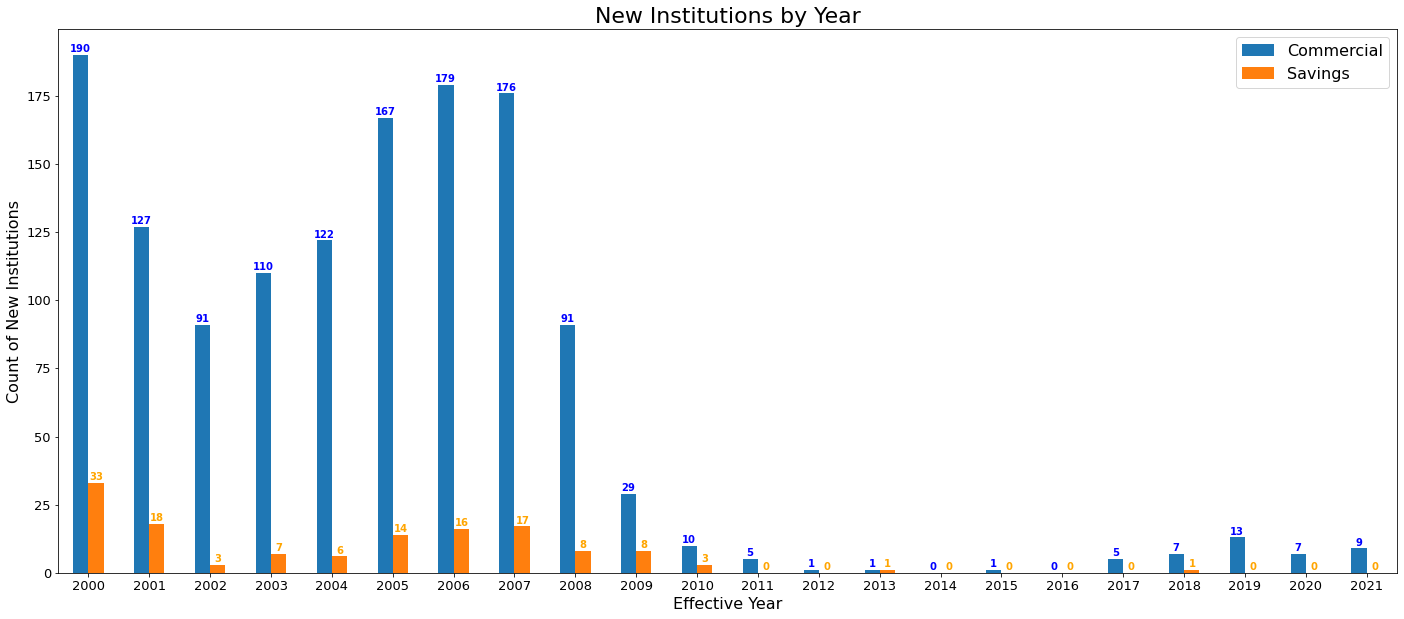

In [57]:
fig, axis = plt.subplots(figsize=(24, 10))

new_by_year_reformat.plot(kind='bar', x='Effective Year', ax=axis)

axis.set_ylabel('Count of New Institutions', size=16)
axis.set_xlabel('Effective Year', size=16)
axis.set_title('New Institutions by Year', size=22)

axis.tick_params(axis='x', labelsize=13, labelrotation=0)
axis.tick_params(axis='y', labelsize=13)

axis.legend(fontsize=16)

for i, v in enumerate(new_by_year_reformat['Commercial']):
    axis.text(i-0.13, v+1, str(v), color='blue', fontweight='bold', horizontalalignment='center')
for i, v in enumerate(new_by_year_reformat['Savings']):
    axis.text(i+0.13, v+1, str(v), color='orange', fontweight='bold', horizontalalignment='center')

fig.show()

## Liquidations

In [44]:
liquidations = pd.read_csv('../../data/Liquidations_10_21_2021.csv')

liquidations_clean = liquidations[['CERT', 'FRM_CLASS_TYPE_DESC', 'EFFDATE', 'PROCDATE']]
liquidations_clean['EFFDATE'] = pd.to_datetime(liquidations_clean['EFFDATE'])
liquidations_clean['PROCDATE'] = pd.to_datetime(liquidations_clean['PROCDATE'])

liquidations_clean

<ipython-input-44-387f5bfbe4c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquidations_clean['EFFDATE'] = pd.to_datetime(liquidations_clean['EFFDATE'])
<ipython-input-44-387f5bfbe4c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liquidations_clean['PROCDATE'] = pd.to_datetime(liquidations_clean['PROCDATE'])


,CERT,FRM_CLASS_TYPE_DESC,EFFDATE,PROCDATE
0,24538,Commercial,1999-12-18,2000-01-04
1,34769,NaN,1998-01-05,2000-01-06
2,25822,NaN,1999-12-13,2000-01-14
3,20719,Savings,1999-12-21,2000-02-14
4,34826,Savings,1999-09-10,2000-02-25
...,...,...,...,...
2924,34617,Savings,2021-03-30,2021-06-29
2925,8058,Commercial,2021-06-30,2021-07-06
2926,31443,Savings,2021-09-30,2021-10-04
2927,13104,Commercial,2021-09-30,2021-10-04


In [45]:
liquidations_by_year = liquidations_clean.groupby(['FRM_CLASS_TYPE_DESC', pd.DatetimeIndex(liquidations_clean['EFFDATE']).year]).count()['CERT'].reset_index()
liquidations_by_year.columns = ['Class Type', 'Effective Year', 'Count']

liquidations_by_year

,Class Type,Effective Year,Count
0,Commercial,1999,1
1,Commercial,2000,5
2,Commercial,2001,7
3,Commercial,2002,10
4,Commercial,2003,10
5,Commercial,2004,7
6,Commercial,2005,7
7,Commercial,2006,4
8,Commercial,2007,5
9,Commercial,2008,6


In [46]:
for year in range(2000, 2022):
    temp_com = liquidations_by_year.loc[(liquidations_by_year['Effective Year'] == year) &
                                        (liquidations_by_year['Class Type'] == 'Commercial')]
    temp_sav = liquidations_by_year.loc[(liquidations_by_year['Effective Year'] == year) &
                                        (liquidations_by_year['Class Type'] == 'Savings')]
    if len(temp_com) != 1:
        liquidations_by_year = liquidations_by_year.append({'Class Type': 'Commercial', 'Effective Year': year, 'Count': 0}, ignore_index=True)
    if len(temp_sav) != 1:
        liquidations_by_year = liquidations_by_year.append({'Class Type': 'Savings', 'Effective Year': year, 'Count': 0}, ignore_index=True)

liquidations_by_year = liquidations_by_year.sort_values(by=['Class Type', 'Effective Year']).reset_index(drop=True)
liquidations_by_year = liquidations_by_year[liquidations_by_year['Effective Year'] >= 2000].reset_index(drop=True)

liquidations_by_year_reformat = pd.DataFrame(liquidations_by_year.loc[liquidations_by_year['Class Type'] == 'Commercial', 'Effective Year'])
liquidations_by_year_reformat['Commercial'] = list(liquidations_by_year.loc[liquidations_by_year['Class Type'] == 'Commercial', 'Count'])
liquidations_by_year_reformat['Savings'] = list(liquidations_by_year.loc[liquidations_by_year['Class Type'] == 'Savings', 'Count'])
liquidations_by_year_reformat

,Effective Year,Commercial,Savings
0,2000,5,1
1,2001,7,3
2,2002,10,5
3,2003,10,4
4,2004,7,5
5,2005,7,5
6,2006,4,0
7,2007,5,1
8,2008,6,3
9,2009,13,2


<ipython-input-47-af42d5a581a8>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


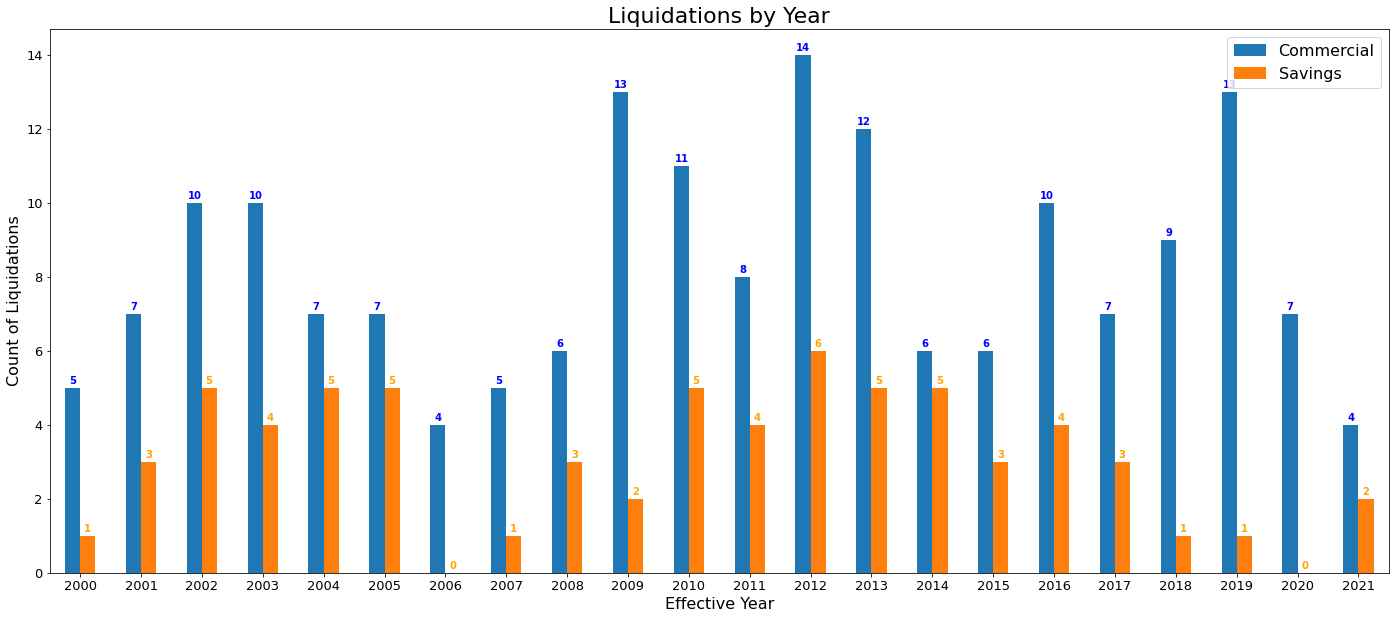

In [47]:
fig, axis = plt.subplots(figsize=(24, 10))

liquidations_by_year_reformat.plot(kind='bar', x='Effective Year', ax=axis)

axis.set_ylabel('Count of Liquidations', size=16)
axis.set_xlabel('Effective Year', size=16)
axis.set_title('Liquidations by Year', size=22)

axis.tick_params(axis='x', labelsize=13, labelrotation=0)
axis.tick_params(axis='y', labelsize=13)

axis.legend(fontsize=16)

for i, v in enumerate(liquidations_by_year_reformat['Commercial']):
    axis.text(i-0.12, v+0.1, str(v), color='blue', fontweight='bold', horizontalalignment='center')
for i, v in enumerate(liquidations_by_year_reformat['Savings']):
    axis.text(i+0.12, v+0.1, str(v), color='orange', fontweight='bold', horizontalalignment='center')

fig.show()

## Business Combinations

In [48]:
combinations = pd.read_csv('../../data/Business_Combinations_10_21_2021.csv')

combinations_clean = combinations[['ACQ_CERT', 'ACQ_CLASS_TYPE_DESC', 'EFFDATE', 'PROCDATE']]
combinations_clean['EFFDATE'] = pd.to_datetime(combinations_clean['EFFDATE'])
combinations_clean['PROCDATE'] = pd.to_datetime(combinations_clean['PROCDATE'])

combinations_clean

<ipython-input-48-440bad1088bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinations_clean['EFFDATE'] = pd.to_datetime(combinations_clean['EFFDATE'])
<ipython-input-48-440bad1088bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinations_clean['PROCDATE'] = pd.to_datetime(combinations_clean['PROCDATE'])


,ACQ_CERT,ACQ_CLASS_TYPE_DESC,EFFDATE,PROCDATE
0,12633,Commercial,1999-12-16,2000-01-01
1,27394,Commercial,1999-12-17,2000-01-01
2,23130,Commercial,1999-12-28,2000-01-05
3,35403,Commercial,1999-12-31,2000-01-06
4,6548,Commercial,1999-10-15,2000-01-06
...,...,...,...,...
7696,15399,Commercial,2021-10-01,2021-10-08
7697,14065,Commercial,2021-10-01,2021-10-08
7698,25858,Commercial,2021-10-02,2021-10-12
7699,6544,Commercial,2021-09-18,2021-10-13


In [49]:
comb_by_year = combinations_clean.groupby(['ACQ_CLASS_TYPE_DESC', pd.DatetimeIndex(combinations_clean['EFFDATE']).year]).count()['ACQ_CERT'].reset_index()
comb_by_year.columns = ['Class Type', 'Effective Year', 'Count']

comb_by_year

,Class Type,Effective Year,Count
0,Commercial,1999,30
1,Commercial,2000,509
2,Commercial,2001,390
3,Commercial,2002,316
4,Commercial,2003,243
5,Commercial,2004,286
6,Commercial,2005,287
7,Commercial,2006,319
8,Commercial,2007,293
9,Commercial,2008,279


In [50]:
for year in range(2000, 2022):
    temp_com = comb_by_year.loc[(comb_by_year['Effective Year'] == year) &
                                (comb_by_year['Class Type'] == 'Commercial')]
    temp_sav = comb_by_year.loc[(comb_by_year['Effective Year'] == year) &
                                (comb_by_year['Class Type'] == 'Savings')]
    if len(temp_com) != 1:
        comb_by_year = comb_by_year.append({'Class Type': 'Commercial', 'Effective Year': year, 'Count': 0}, ignore_index=True)
    if len(temp_sav) != 1:
        comb_by_year = comb_by_year.append({'Class Type': 'Savings', 'Effective Year': year, 'Count': 0}, ignore_index=True)

comb_by_year = comb_by_year.sort_values(by=['Class Type', 'Effective Year']).reset_index(drop=True)
comb_by_year = comb_by_year[comb_by_year['Effective Year'] >= 2000].reset_index(drop=True)

comb_by_year_reformat = pd.DataFrame(comb_by_year.loc[comb_by_year['Class Type'] == 'Commercial', 'Effective Year'])
comb_by_year_reformat['Commercial'] = list(comb_by_year.loc[comb_by_year['Class Type'] == 'Commercial', 'Count'])
comb_by_year_reformat['Savings'] = list(comb_by_year.loc[comb_by_year['Class Type'] == 'Savings', 'Count'])
comb_by_year_reformat

,Effective Year,Commercial,Savings
0,2000,509,44
1,2001,390,62
2,2002,316,38
3,2003,243,38
4,2004,286,44
5,2005,287,35
6,2006,319,28
7,2007,293,46
8,2008,279,26
9,2009,170,16


<ipython-input-51-3bfbc1e9a68c>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


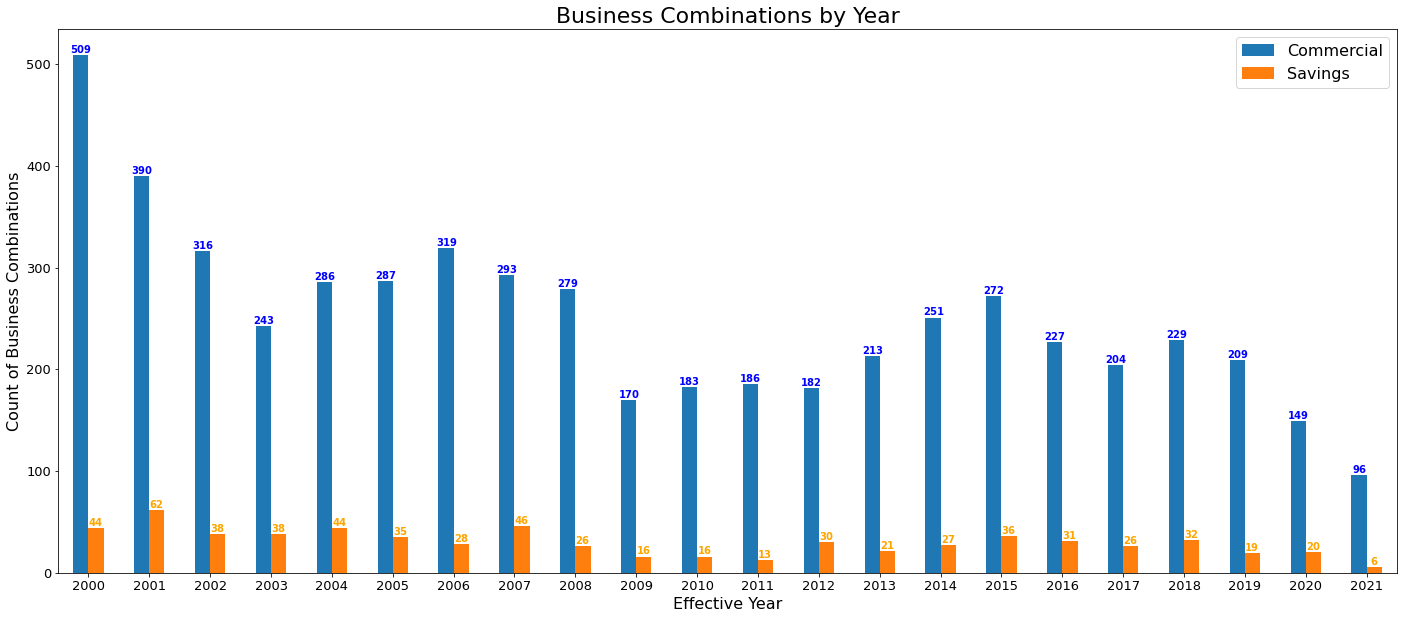

In [51]:
fig, axis = plt.subplots(figsize=(24, 10))

comb_by_year_reformat.plot(kind='bar', x='Effective Year', ax=axis)

axis.set_ylabel('Count of Business Combinations', size=16)
axis.set_xlabel('Effective Year', size=16)
axis.set_title('Business Combinations by Year', size=22)

axis.tick_params(axis='x', labelsize=13, labelrotation=0)
axis.tick_params(axis='y', labelsize=13)

axis.legend(fontsize=16)

for i, v in enumerate(comb_by_year_reformat['Commercial']):
    axis.text(i-0.12, v+2, str(v), color='blue', fontweight='bold', horizontalalignment='center')
for i, v in enumerate(comb_by_year_reformat['Savings']):
    axis.text(i+0.12, v+2, str(v), color='orange', fontweight='bold', horizontalalignment='center')

fig.show()

## Business Combinations - Failures

In [52]:
failures = pd.read_csv('../../data/Business_Combinations_-_Failures_10_21_2021.csv')

failures_clean = failures[['ACQ_CERT', 'ACQ_CLASS_TYPE_DESC', 'EFFDATE', 'PROCDATE']]
failures_clean['EFFDATE'] = pd.to_datetime(failures_clean['EFFDATE'])
failures_clean['PROCDATE'] = pd.to_datetime(failures_clean['PROCDATE'])

failures_clean.head()

<ipython-input-52-0466ed62245b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failures_clean['EFFDATE'] = pd.to_datetime(failures_clean['EFFDATE'])
<ipython-input-52-0466ed62245b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failures_clean['PROCDATE'] = pd.to_datetime(failures_clean['PROCDATE'])


,ACQ_CERT,ACQ_CLASS_TYPE_DESC,EFFDATE,PROCDATE
0,35516,Commercial,2000-01-15,2000-02-01
1,8033,Commercial,2000-03-10,2000-03-13
2,19977,Commercial,2000-06-02,2000-06-06
3,57076,Commercial,2000-07-14,2000-07-20
4,15310,Commercial,2000-09-29,2000-10-02


In [53]:
comb_failures_by_year = failures_clean.groupby(['ACQ_CLASS_TYPE_DESC', pd.DatetimeIndex(failures_clean['EFFDATE']).year]).count()['ACQ_CERT'].reset_index()
comb_failures_by_year.columns = ['Class Type', 'Effective Year', 'Count']

comb_failures_by_year

,Class Type,Effective Year,Count
0,Commercial,2000,7
1,Commercial,2001,3
2,Commercial,2002,7
3,Commercial,2003,2
4,Commercial,2004,3
5,Commercial,2007,2
6,Commercial,2008,20
7,Commercial,2009,122
8,Commercial,2010,131
9,Commercial,2011,85


In [54]:
for year in range(2000, 2022):
    temp_com = comb_failures_by_year.loc[(comb_failures_by_year['Effective Year'] == year) &
                                         (comb_failures_by_year['Class Type'] == 'Commercial')]
    temp_sav = comb_failures_by_year.loc[(comb_failures_by_year['Effective Year'] == year) &
                                         (comb_failures_by_year['Class Type'] == 'Savings')]
    if len(temp_com) != 1:
        comb_failures_by_year = comb_failures_by_year.append({'Class Type': 'Commercial', 'Effective Year': year, 'Count': 0}, ignore_index=True)
    if len(temp_sav) != 1:
        comb_failures_by_year = comb_failures_by_year.append({'Class Type': 'Savings', 'Effective Year': year, 'Count': 0}, ignore_index=True)

comb_failures_by_year = comb_failures_by_year.sort_values(by=['Class Type', 'Effective Year']).reset_index(drop=True)

comb_failures_by_year_reformat = pd.DataFrame(comb_failures_by_year.loc[comb_failures_by_year['Class Type'] == 'Commercial', 'Effective Year'])
comb_failures_by_year_reformat['Commercial'] = list(comb_failures_by_year.loc[comb_failures_by_year['Class Type'] == 'Commercial', 'Count'])
comb_failures_by_year_reformat['Savings'] = list(comb_failures_by_year.loc[comb_failures_by_year['Class Type'] == 'Savings', 'Count'])
comb_failures_by_year_reformat

,Effective Year,Commercial,Savings
0,2000,7,0
1,2001,3,1
2,2002,7,0
3,2003,2,1
4,2004,3,0
5,2005,0,0
6,2006,0,0
7,2007,2,1
8,2008,20,4
9,2009,122,12


<ipython-input-55-356ff54052f0>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


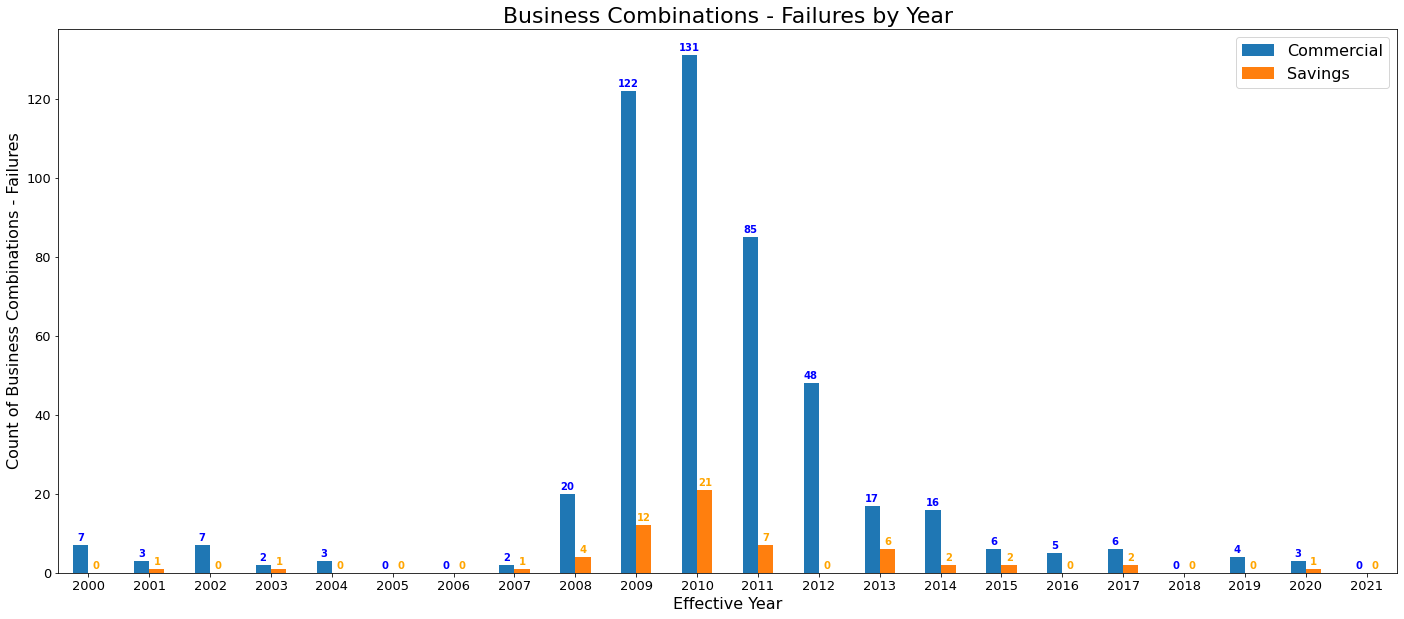

In [55]:
fig, axis = plt.subplots(figsize=(24, 10))

comb_failures_by_year_reformat.plot(kind='bar', x='Effective Year', ax=axis)

axis.set_ylabel('Count of Business Combinations - Failures', size=16)
axis.set_xlabel('Effective Year', size=16)
axis.set_title('Business Combinations - Failures by Year', size=22)

axis.tick_params(axis='x', labelsize=13, labelrotation=0)
axis.tick_params(axis='y', labelsize=13)

axis.legend(fontsize=16)

for i, v in enumerate(comb_failures_by_year_reformat['Commercial']):
    axis.text(i-0.13, v+1, str(v), color='blue', fontweight='bold', horizontalalignment='center')
for i, v in enumerate(comb_failures_by_year_reformat['Savings']):
    axis.text(i+0.13, v+1, str(v), color='orange', fontweight='bold', horizontalalignment='center')

fig.show()

## Summary Table - Commercial Banks

In [87]:
commercial_banks_sum = pd.read_csv('../../data/cb_structure.csv')
commercial_banks_sum = commercial_banks_sum[['YEAR', 'New_Char', 'MERGERS', 'UNASSIST', 'PAID_OFF', 'REL_CO', 'OTHER', 'TOTAL']]
commercial_banks_sum = commercial_banks_sum[commercial_banks_sum['YEAR'] >= 2000]

cb_terms = {'New_Char':'New Institutions',
            'MERGERS':'Mergers - Failure',
            'UNASSIST':'Mergers - NonFailure', 
            'PAID_OFF':'Failures Paid Off',
            'REL_CO':'Conversions',
            'OTHER':'Other Adjustments',
            'TOTAL':'Total'}
commercial_banks_sum = commercial_banks_sum.rename(columns=cb_terms)

commercial_banks_sum

,YEAR,New Institutions,Mergers - Failure,Mergers - NonFailure,Failures Paid Off,Conversions,Other Adjustments,Total
1,2000,190,7,509,0,471,431,8200
2,2001,127,3,390,0,405,369,7998
3,2002,91,7,316,4,311,268,7803
4,2003,110,2,243,0,233,223,7698
5,2004,122,3,286,0,249,224,7570
6,2005,167,0,287,0,234,219,7467
7,2006,179,0,319,0,255,239,7402
8,2007,176,2,293,0,309,297,7288
9,2008,91,20,279,0,274,251,7086
10,2009,29,122,170,6,233,228,6828


In [82]:
commercial_banks_calc = pd.DataFrame(comb_by_year_reformat['Effective Year'])
commercial_banks_calc['New Institutions'] = new_by_year_reformat['Commercial']
commercial_banks_calc['Mergers - Failure'] = comb_failures_by_year_reformat['Commercial']
commercial_banks_calc['Mergers - NonFailure'] = comb_by_year_reformat['Commercial']
commercial_banks_calc['Liquidations'] = liquidations_by_year_reformat['Commercial'] 

commercial_banks_calc[commercial_banks_calc['Effective Year'] <= 2020]

# Liquidations looks wrong -> Maybe some sort of flag to indicate what will be sold later?

,Effective Year,New Institutions,Mergers - Failure,Mergers - NonFailure,Liquidations
0,2000,190,7,509,5
1,2001,127,3,390,7
2,2002,91,7,316,10
3,2003,110,2,243,10
4,2004,122,3,286,7
5,2005,167,0,287,7
6,2006,179,0,319,4
7,2007,176,2,293,5
8,2008,91,20,279,6
9,2009,29,122,170,13


## Summary Table - Savings Institutions

In [75]:
savings_institutions_sum = pd.read_csv('../../data/si_structure.csv')
savings_institutions_sum = savings_institutions_sum[['YEAR', 'newcount', 'chartoth', 'chrtrest', 'comboass', 'combos', 'tomerg', 'SAVINGS']]
savings_institutions_sum = savings_institutions_sum[savings_institutions_sum['YEAR'] >= 2000]

si_terms = {'newcount':'New Institutions',
            'chartoth':'Commercial Bank Transfers',
            'chrtrest':'Uninsured to Insured',
            'comboass':' Assisted Mergers with Thrifts',
            'combos':'Unassisted Mergers with Thrifts',
            'tomerg': 'Unassisted Mergers with CBS',
            'SAVINGS':'Total'}
savings_institutions_sum = savings_institutions_sum.rename(columns=si_terms)

savings_institutions_sum

,YEAR,New Institutions,Commercial Bank Transfers,Uninsured to Insured,Assisted Mergers with Thrifts,Unassisted Mergers with Thrifts,Unassisted Mergers with CBS,Total
1,2000,30,4,45,0,28,8,1587
2,2001,16,3,57,1,32,11,1530
3,2002,1,2,10,0,28,8,1469
4,2003,5,2,14,0,24,13,1411
5,2004,5,2,6,0,30,14,1349
6,2005,12,2,2,0,20,14,1309
7,2006,14,1,2,0,15,12,1284
8,2007,9,4,8,1,22,20,1255
9,2008,4,6,2,1,16,9,1232
10,2009,1,0,0,5,11,5,1183


In [89]:
savings_institutions_calc = pd.DataFrame(comb_by_year_reformat['Effective Year'])
savings_institutions_calc['New Institutions'] = new_by_year_reformat['Savings']
savings_institutions_calc['Mergers - Failure'] = comb_failures_by_year_reformat['Savings']
savings_institutions_calc['Mergers - NonFailure'] = comb_by_year_reformat['Savings']
savings_institutions_calc['Liquidations'] = liquidations_by_year_reformat['Savings']   

savings_institutions_calc[savings_institutions_calc['Effective Year'] <= 2020]

# It all looks wrong
# Maybe a different date (doubtful)? Maybe a flag indicating if it's insured by FDIC (more likely)?
# Column names are also unintuitive, need better definitions

,Effective Year,New Institutions,Mergers - Failure,Mergers - NonFailure,Liquidations
0,2000,33,0,44,1
1,2001,18,1,62,3
2,2002,3,0,38,5
3,2003,7,1,38,4
4,2004,6,0,44,5
5,2005,14,0,35,5
6,2006,16,0,28,0
7,2007,17,1,46,1
8,2008,8,4,26,3
9,2009,8,12,16,2
